#                               GRIP : The Sparks Foundation



#     Data Science and Business Analytics

#     Author : Yukti Taneja

#     Task 1 : Prediction Using Supervised ML



IN THIS REGRESSION TASK WE WILL PREDICT THE PERCENTAGE OF MARKS THAT A STUDENT IS EXPECTED TO SCORE BASED UPON THE NUMBER OF STUDY HOURS. THIS IS A SIMPLE LINEAR REGRESSION TASK AS IT INVOLVES TWO VARIABLES.
DATA : 'http://bit.ly/w-data'

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("data imported successfully")

s_data.head(10)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


LET'S PLOT OUR DATA POINTS ON 2-D GRAPH TO EYEBALL OUR DATASET AND SEE IF WE CAN MANUALLY FIND ANY RELATIONSHIP BETWEEN THE DATA. WE CAN CREATE PLOT WITH THE FOLLOWING SCRIPT:

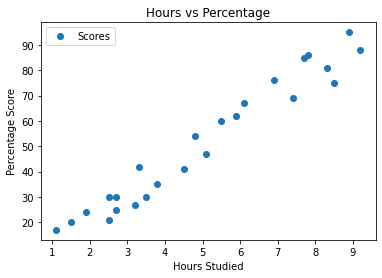

In [7]:
# Plotting the distribution of scores

s_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

FROM THE ABOVE GRAPH, IT IS CLEAR THAT THERE IS POSITIVE LINEAR RELATION BETWEEN THE HOURS STUDIED AND PERCENTAGE SCORE.

THE NEXT STEP IS TO DIVIDE THE DATA INTO "ATTRIBUTES"(INPUTS) AND "LABELS"(OUTPUTS).

In [4]:
x = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

SPLITTING DATA INTO TRAINING AND TESTING SETS. WE WILL USE SCIKIT-LEARN'S BUILT-IN TRAIN_TEST_SPLIT() METHOD :-

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)



# TRAINING THE ALGORITHM

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("Training complete.")

Training complete.


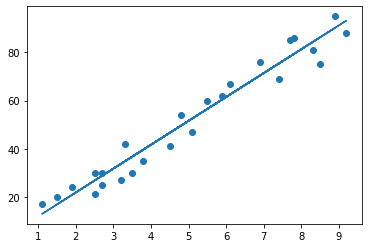

In [7]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()
            

# PREDICTIONS

In [8]:
print(x_test) # Testing data - In hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
print("Training Score",regressor.score(x_train,y_train))
print("Testing Score",regressor.score(x_test,y_test))


Training Score 0.9515510725211552
Testing Score 0.9454906892105355


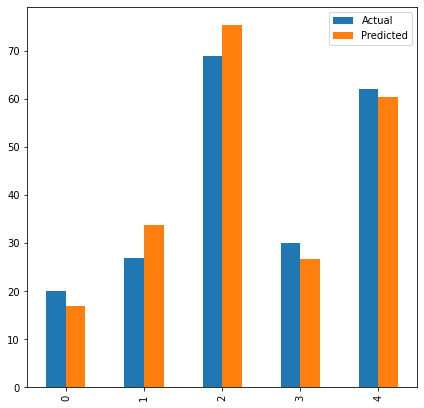

In [11]:
# Plotting the bar chat to depict the actual and predicted value
df.plot(kind = 'bar',figsize = (7,7))
plt.show()



In [ ]:
# Prediction for 9.25 hours
hours= [[9.25]]
own_pred = regressor.predict(hours)
print("No of hours={}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

# EVALUATING MODEL

In [25]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.598769307217406
Root Mean Squared Error:  4.647447612100367
Explained Variance Score:  0.9482829156738147
